In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tqdm import tqdm

In [3]:
df = pd.read_parquet('../Naukri_clean/Cleaned_Extract.parquet')

In [4]:
df['role'] = df['role'].astype(str)

In [5]:
df['industry_type'] = df['industry_type'].astype('str')
# df = df[df['industry_type'].str.contains('finan')]

In [6]:
df.drop(columns=[i for i in df.columns if 'skill' in i],inplace=True)

In [7]:
df.drop(columns=['department','company_name','experience', 'salary','description','id','job_title', 'location', 'posted_on','extracted_on'],inplace=True)

In [8]:
df['avgsal'] = (df['salary_minimum'] + df['salary_maximum']) / 2
df['avgexp'] = (df['experience_minimum'] + df['experience_maximum']) / 2

In [9]:
df.columns

Index(['role', 'industry_type', 'employment_type', 'role_category',
       'salary_minimum', 'salary_maximum', 'experience_minimum',
       'experience_maximum', 'avgsal', 'avgexp'],
      dtype='object')

In [10]:
df.drop(columns=['employment_type', 'role_category'],inplace=True)

In [11]:
# df['extracted_on'] = pd.to_datetime(df['extracted_on'])
# df['posted_on'] = pd.to_datetime(df['posted_on'])

In [12]:
# df = df[df['extracted_on'] >= '2024-01-01']

In [13]:
countdf = df['role'].str.lower().value_counts().reset_index()
countdf.columns = ['role','count']
falts = ~countdf['role'].isin(['other','none'])
countdf = countdf[(countdf['count'] > 50)&(countdf['role']!= 'nan')&falts]

In [14]:
df = df[df['role'] != 'sales']

In [15]:
roles = countdf[countdf['count'] > 689]['role'].to_list()

In [16]:
df = df[df['role'].isin(roles)]

In [17]:
# countdf = df['department'].str.lower().value_counts().reset_index()
# countdf.columns = ['department','count']
# falts = ~countdf['department'].isin(['other','none'])
# countdf = countdf[(countdf['count'] > 500)&(countdf['department']!= 'nan')&falts]

In [18]:
# roles = countdf[countdf['count'] > 500]['department'].to_list()

In [19]:
# plt.figure(figsize=(6,15))
# sns.barplot(x=countdf['count'],y=countdf['industry'])
# plt.xticks(rotation= 45)
# plt.title('roles and frequency')
# sns.despine()

In [20]:
df['role'].unique()

array(['customer service/support', 'it infrastructure services',
       'software developer', 'data engineer',
       'devops engineer/consultant', 'recruiter',
       'bfsi trading and investments',
       'automation engineer/developer/architect', 'medical biller/coder',
       'field sales', 'tech support', 'business development',
       'human resources', 'technical/functional consultant',
       'digital/seo marketing', 'it security', 'design engineer',
       'relationship manager', 'graphic designer', 'technical architect',
       'tech lead', 'mobile/app developer', 'full stack developer',
       'back end developer', 'front end developer'], dtype=object)

In [21]:
# df[df['extracted_on'] < '2024-01-01'].reset_index(drop=True).to_excel('Salary_data.xlsx',index=False)

In [22]:
del df['industry_type']

In [23]:
df['avgsal']

0          312500.0
1         1025000.0
3          180000.0
7          800000.0
8          700000.0
            ...    
158303     400000.0
158311    1050000.0
158312     330000.0
158318     550000.0
158329    1505000.0
Name: avgsal, Length: 43493, dtype: float64

In [24]:
df['avergsal'] = [round(i,2) for i in df['avgsal'] // 100000]
df['avgsal'] = [round(i,2) for i in df['avgsal'] / 100000]

In [25]:
df = df[df['avgsal'] < 30]

<Axes: xlabel='avgsal', ylabel='Count'>

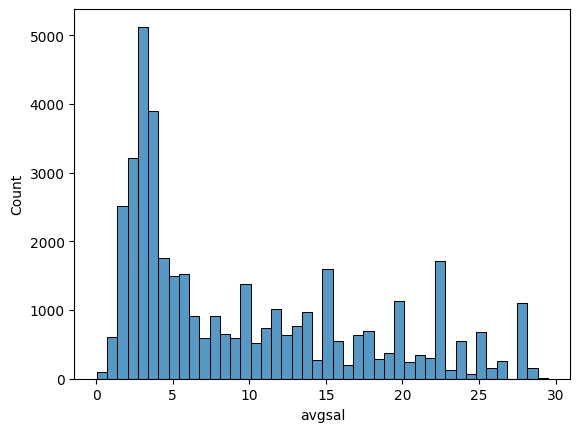

In [26]:
sns.histplot(df[df['avgsal'] < 30]['avgsal'])

In [27]:
df['role'].unique()

array(['customer service/support', 'it infrastructure services',
       'software developer', 'data engineer',
       'devops engineer/consultant', 'recruiter',
       'bfsi trading and investments',
       'automation engineer/developer/architect', 'medical biller/coder',
       'field sales', 'tech support', 'business development',
       'human resources', 'technical/functional consultant',
       'digital/seo marketing', 'it security', 'design engineer',
       'relationship manager', 'graphic designer', 'technical architect',
       'tech lead', 'mobile/app developer', 'full stack developer',
       'back end developer', 'front end developer'], dtype=object)

In [28]:
for i in df['role'].unique():
    vc = df[df['role'] == i]['avergsal'].value_counts()
    inlis = vc[vc>30].index.tolist()
    filt1 = ~df['avergsal'].isin(inlis)
    filt2 = df['role'] == i
    df = df[~(filt1 & filt2)]

In [29]:
df

,role,salary_minimum,salary_maximum,experience_minimum,experience_maximum,avgsal,avgexp,avergsal
0,customer service/support,225000.0,400000.0,0.0,5.0,3.12,2.5,3.0
1,it infrastructure services,550000.0,1500000.0,4.0,6.0,10.25,5.0,10.0
3,software developer,60000.0,300000.0,4.0,9.0,1.80,6.5,1.0
7,data engineer,500000.0,1100000.0,3.0,7.0,8.00,5.0,8.0
20,recruiter,250000.0,500000.0,1.0,6.0,3.75,3.5,3.0
...,...,...,...,...,...,...,...,...
158298,medical biller/coder,220000.0,440000.0,0.0,0.0,3.30,0.0,3.0
158303,medical biller/coder,250000.0,550000.0,0.0,0.0,4.00,0.0,4.0
158311,software developer,100000.0,2000000.0,4.0,4.0,10.50,4.0,10.0
158312,medical biller/coder,220000.0,440000.0,0.0,0.0,3.30,0.0,3.0


In [30]:
plt.figure(figsize=(2*len(df['role'].unique()),7*len(df['role'].unique())))
roleswithdata = list(df['role'].unique())
for i in range(len(df['role'].unique())):    
    plt.subplot(14,3,i+1)
    sns.histplot(df[df['role'] == roleswithdata[i]]['avgsal'])
    plt.xticks(rotation= 45)
    plt.title(roleswithdata[i])
    plt.tight_layout()
    sns.despine()

In [31]:
plt.figure(figsize=(2*len(df['role'].unique()),7*len(df['role'].unique())))
roleswithdata = list(df['role'].unique())
for i in range(len(df['role'].unique())):    
    plt.subplot(14,3,i+1)
    sns.barplot(data = df[df['role'] == roleswithdata[i]], y = 'avgsal',x = 'avgexp')
    plt.xticks(rotation= 45)
    plt.title(roleswithdata[i])
    plt.tight_layout()
    sns.despine()

In [32]:
df.columns

Index(['role', 'salary_minimum', 'salary_maximum', 'experience_minimum',
       'experience_maximum', 'avgsal', 'avgexp', 'avergsal'],
      dtype='object')

In [33]:
df = df[~df['experience_minimum'].isna()]
df.reset_index(drop=True,inplace=True)

In [34]:
df.select_dtypes(include=[float, int])

,salary_minimum,salary_maximum,experience_minimum,experience_maximum,avgsal,avgexp,avergsal
0,225000.0,400000.0,0.0,5.0,3.12,2.5,3.0
1,550000.0,1500000.0,4.0,6.0,10.25,5.0,10.0
2,60000.0,300000.0,4.0,9.0,1.80,6.5,1.0
3,500000.0,1100000.0,3.0,7.0,8.00,5.0,8.0
4,250000.0,500000.0,1.0,6.0,3.75,3.5,3.0
...,...,...,...,...,...,...,...
36112,220000.0,440000.0,0.0,0.0,3.30,0.0,3.0
36113,250000.0,550000.0,0.0,0.0,4.00,0.0,4.0
36114,100000.0,2000000.0,4.0,4.0,10.50,4.0,10.0
36115,220000.0,440000.0,0.0,0.0,3.30,0.0,3.0


In [35]:
del df['avergsal']

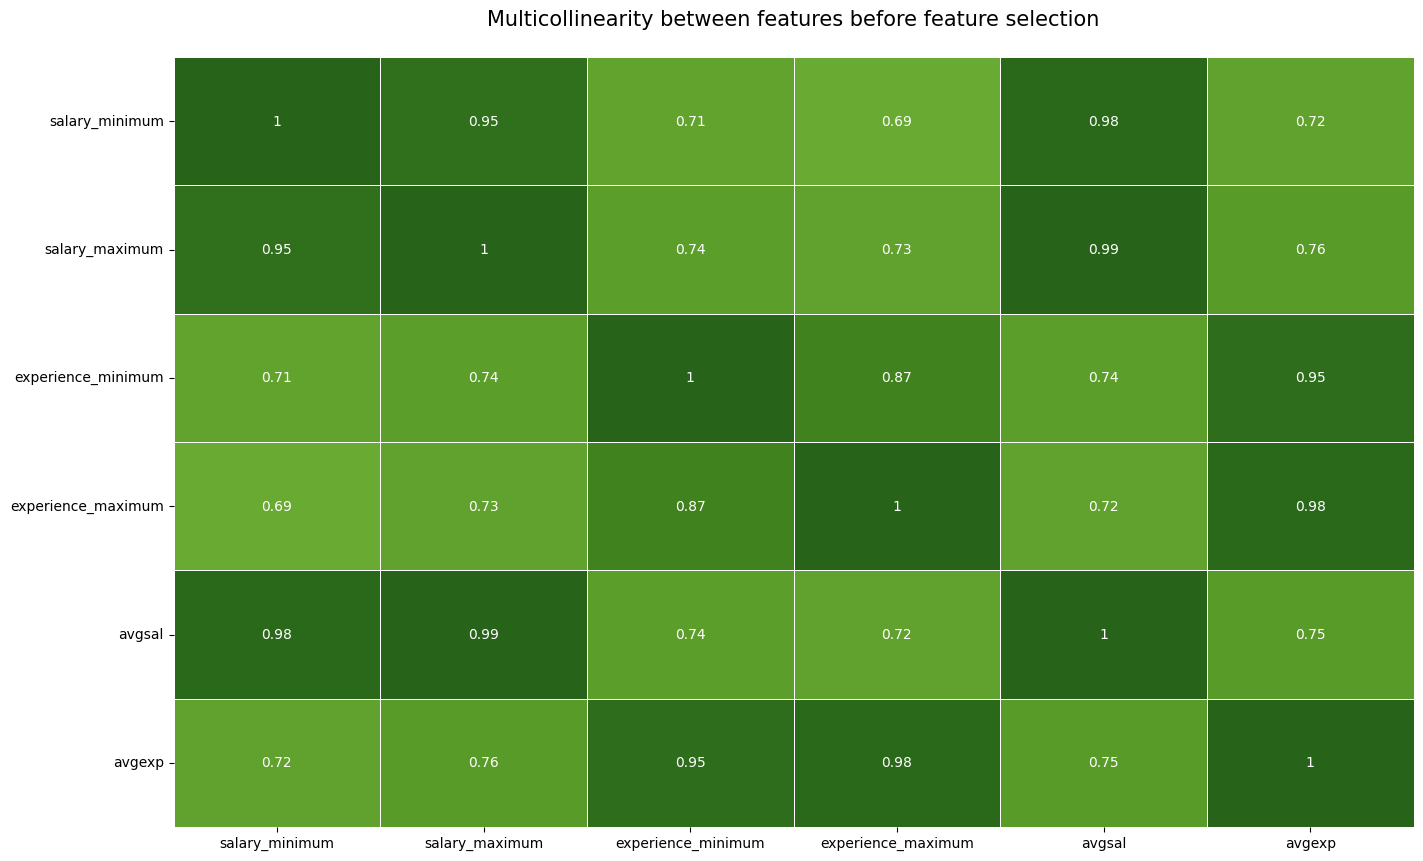

In [36]:
plt.figure(figsize=(16,10))
sns.heatmap(df.select_dtypes(include=[float, int]).corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.title('Multicollinearity between features before feature selection\n', fontsize = 15)
plt.show()

In [37]:
df = pd.get_dummies(df,columns = ['role'])

In [38]:
df = df.astype(float)

In [39]:
del df['avgexp']

In [40]:
lrlis = [round(i,2) for i in np.arange(0.01, 1, 0.01).tolist()]

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

x = df.drop(columns=['avgsal','salary_minimum','salary_maximum'], axis=1)
y = df[['avgsal','salary_minimum','salary_maximum']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [48]:
# pd.DataFrame(columns=x_train.columns)#.to_csv('x_train.csv',index=False)
# x_train[:1].to_csv('x_train.csv',index=False)

In [ ]:
model = XGBRegressor()

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [4],
    'learning_rate': lrlis,
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='neg_mean_squared_error', verbose=10)
grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

In [218]:
best_model.score(x_train,y_train)

0.7261450886726379

In [219]:
best_params = {
    'learning_rate': 0.19,
    'max_depth': 4,
    'n_estimators': 200
}
best_model = XGBRegressor(**best_params)
best_model.fit(x_train, y_train)
best_model.score(x_test,y_test)

0.7084813714027405

In [215]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, best_model.predict(x_test))
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 114146804110.89246


In [216]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, best_model.predict(x_test))
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 180470.27966172431


In [217]:
import numpy as np
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 337856.1885046542


In [220]:
import pickle
model_filepath = 'GB.pkl'

# Save the model to the file
with open(model_filepath, 'wb') as file:
    pickle.dump(best_model, file)